***Importaciòn de librerias***

In [151]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


**Leer el archivo**

In [152]:
#comprobar la ruta
import os
ruta= '../Archivos/data.csv'
print(os.path.exists(ruta))


True


In [153]:
#convertir csv a dataframe
ruta = '../Archivos/data.csv'
sp_titanic = pd.read_csv(ruta)
#mostrar las primeras 5 filas del dataframe
sp_titanic.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [154]:
# Muestra el número de filas y columnas
print("Numero de filas y columnas:" , sp_titanic.shape)

Numero de filas y columnas: (8693, 14)


In [155]:
sp_titanic.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

**Informaciòn del dataset**
El conjunto de datos tiene las siguientes columnas:

**PassengerId**: Identificador único para cada pasajero.

**HomePlanet**: Planeta de origen del pasajero.

**CryoSleep**: Indica si el pasajero estaba en criosueño durante el viaje.

**Cabin**: Número de cabina del pasajero (incluye múltiples componentes).

         Deck: La primera letra, que indica el "piso" o "cubierta" donde estaba ubicada la cabina.

        Num: El número de la cabina.

        Side: El lado de la nave (por ejemplo, "P" para port (izquierda) o "S" para starboard (derecha)).


**Destination**: Destino final del pasajero (Ej. TRAPPIST-1e).

**Age**: Edad del pasajero.

**VIP**: Indica si el pasajero tenía un estatus VIP.

**RoomService**: Gasto en el servicio de habitaciones.

**FoodCourt**: Gasto en la zona de comida.

**ShoppingMall**: Gasto en el centro comercial.

**Spa**: Gasto en el spa.

**VRDeck**: Gasto en la plataforma de realidad virtual.

**Name**: Nombre del pasajero.

**Transported**: Etiqueta de destino que indica si el pasajero fue transportado a una dimensión alternativa (objetivo del modelo).

In [156]:
sp_titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [157]:
sp_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


***Limpieza de Datos***

In [158]:
#buscar datos duplicados
print("Numero total de duplicados:", sp_titanic.duplicated().sum())

Numero total de duplicados: 0


In [159]:
#identificar valores nulos
print("Valores nulos:\n", sp_titanic.isnull().sum())


Valores nulos:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


<Axes: >

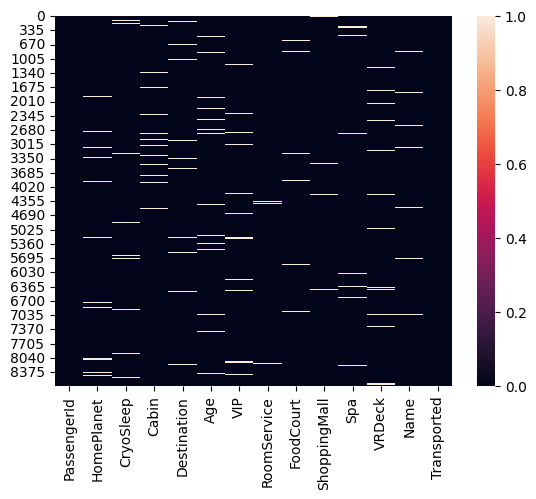

In [160]:
#grafico para comprobar valores nulos
sns.heatmap(sp_titanic.isnull())

In [161]:
sp_titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [162]:
#verificar el tipo de datos
sp_titanic.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [163]:
#eliminar columnas no necesarias
sp_titanic.drop(['Name', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'PassengerId'], axis=1, inplace=True)

In [164]:
#comprobar eliminaciòn de columnas
sp_titanic.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True


In [172]:
# Rellenar valores faltantes con la media
sp_titanic['Age'].fillna(sp_titanic['Age'].median(), inplace=True)
sp_titanic['Age'] = sp_titanic['Age'].astype(int)


C:\Users\lisyj\AppData\Local\Temp\ipykernel_12692\2396333018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sp_titanic['Age'].fillna(sp_titanic['Age'].median(), inplace=True)


In [166]:
# Rellenar valores faltantes con la moda
for column in ['HomePlanet', 'CryoSleep', 'VIP', 'Destination']:
    mode_value = sp_titanic[column].mode()[0]
    sp_titanic[column] = sp_titanic[column].fillna(mode_value)

C:\Users\lisyj\AppData\Local\Temp\ipykernel_12692\1163373623.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sp_titanic[column] = sp_titanic[column].fillna(mode_value)


In [167]:
# Separar la columna Cabin en Deck, Num, y Side
sp_titanic[['Deck', 'Num', 'Side']] = sp_titanic['Cabin'].str.split('/', expand=True)

# Verificar las nuevas columnas
sp_titanic[['Cabin', 'Deck', 'Num', 'Side']].head()

#eliminar la columna original Cabin
sp_titanic.drop(columns=['Cabin'], inplace=True)

In [168]:
#Llenar valores faltantes con la moda
for column in ['Deck', 'Num', 'Side']:
    mode_value = sp_titanic[column].mode()[0]
    sp_titanic[column] = sp_titanic[column].fillna(mode_value)

In [178]:
# Convierte todas las columnas categoricas a numéricas
sp_titanic[['Transported','VIP','CryoSleep']] = sp_titanic[['Transported','VIP','CryoSleep']].astype(int)